In [22]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
path_to_augmented_dataset = "F:\\2022-2023\\SEM 1\\CV\\Dataset_1\\Augmented\\"
temp = ['Bowlegs', 'Knock-knee', 'Normal Knee']

# GET FEATURES

In [24]:
final = pd.DataFrame()
c = 0
for i in temp:
    path_to_folder = path_to_augmented_dataset+i
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+"\\"+fname
        img = cv2.imread(path_to_file)
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(img, None)
        # sift = cv2.SIFT_create()
        # keypoints, descriptors = sift.detectAndCompute(img, None)
        out1 = pd.DataFrame(descriptors)
        csv_data = out1.to_csv(r'ORB\ORB_{}.csv'.format(i), mode='a', index=False)

In [25]:
def read_data(path):
    data = pd.read_csv(path)
    return data.astype(np.uint8)

In [26]:
p0 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_Bowlegs.csv'
p1 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_Knock-knee.csv'
p2 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_Normal Knee.csv'
pf0 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_FINAL_Bowlegs.csv'
pf1 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_FINAL_Knock-knee.csv'
pf2 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_FINAL_Normal Knee.csv'
pf = 'ORB\ORB_FINAL.csv'

data1 = read_data(p0)
print(data1)
data2 = read_data(p1)
print(data2)
data3 = read_data(p2)
print(data3)

# data_f = data_f.append(data2)
# data_f = data_f.append(data3)
# csv_data = data_f.to_csv(r'ORB\ORB_FINAL.csv', mode='w', index=False)
# print("data_f = ",data_f)

         0    1    2    3    4    5    6    7    8    9  ...   22   23   24  \
0       94   48  115  196   51   91   91   88   45  228  ...  165  204  211   
1      232  180  188  113  141  125  213  175  219  255  ...  251   19  203   
2       57  144  224  227   53   30  248   16   85  105  ...  117  128   70   
3       71  233  164  155  221  149  250  236  143   21  ...  219  241   47   
4       31   69  120  230  119   18  254  168   73    0  ...   60  236  243   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
34752    1    8  255  113  100  174  105   19  126   73  ...  101   85  198   
34753   49  207   75  239   54    2  239  245  100   72  ...    5   45  180   
34754   49  207   79  239   54    2  111  181  100    0  ...    5   45  244   
34755  209   89   95  237   36   10  111  180  100  202  ...  101   44  228   
34756  213   92  191  247   40  110  107   16  244  218  ...  187   40  193   

        25   26   27   28   29   30   31  
0      2

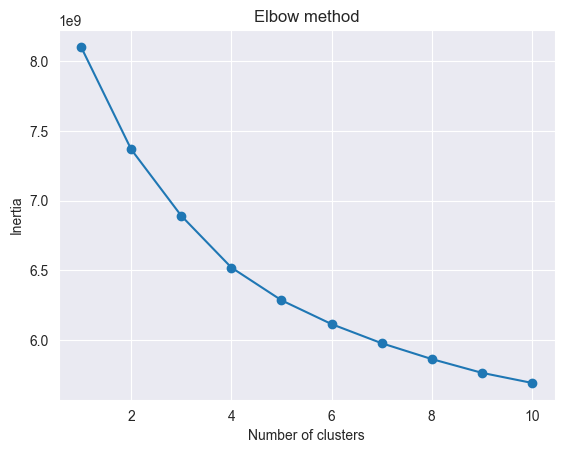

In [31]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data3)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
kmeans1 = KMeans(n_clusters=6)
kmeans1.fit(data1)

#mango
kmeans2 = KMeans(n_clusters=6)
kmeans2.fit(data2)

#papaya
kmeans3 = KMeans(n_clusters=6)
kmeans3.fit(data3)

KMeans(n_clusters=6)

In [10]:
import pickle

with open("ORB_model1.pkl", "wb") as f:
    pickle.dump(kmeans1, f)
with open("ORB_model2.pkl", "wb") as f:
    pickle.dump(kmeans2, f)
with open("ORB_model3.pkl", "wb") as f:
    pickle.dump(kmeans3, f)

In [33]:
final = pd.DataFrame()
c = 0

for i in temp:
    data = []
    path_to_folder = path_to_augmented_dataset+i
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+"\\"+fname
        img = cv2.imread(path_to_file)
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(img, None)
        out1 = pd.DataFrame(descriptors)
        array_double = np.array(out1, dtype=np.double)
        if array_double != []:
            if i == temp[0]:
                print("model 1")
                a=kmeans1.predict(array_double)
            elif i == temp[1]:
                print("model 2")
                a = kmeans2.predict(array_double)
            else:
                print("model 3")
                a = kmeans3.predict(array_double)
            hist=np.histogram(a,bins=200)
            data.append(hist[0])
            # csv_data = out1.to_csv(r'SIFT\SIFT_{}.csv'.format(i), mode='a', index=False)
    Output = pd.DataFrame(data)
    Output["Class"] = c
    csv_data=Output.to_csv(r'ORB\ORB_FINAL_{}.csv'.format(i), mode='a', index=False)
    c += 1

C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check t

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if array_double != []:
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KM

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check t

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if array_double != []:
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KM

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if array_double != []:
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KM

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1
model 1


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check t

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2
model 2


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 2
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


model 3
model 3


C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\3523626439.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if array_double != []:
C:\Users\neilk\AppData\Local\Programs\Python

model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3
model 3


In [34]:
d1 = fd =  read_data(pf0)
print(d1)
d2 = read_data(pf1)
print(d2)
d3 = read_data(pf2)
print(d3)
fd = fd.append(d2)
fd = fd.append(d3)
print(fd)
csv_data=fd.to_csv(pf, mode='a', index=False)

      0  1  2  3  4  5  6  7  8  9  ...  191  192  193  194  195  196  197  \
0     1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2     2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3     2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4    13  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
..   .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
934   2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
935   2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
936   1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
937   5  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
938   2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

     198  199  Class  
0      0    1      0  
1      0    0    

C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\802692839.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fd = fd.append(d2)
C:\Users\neilk\AppData\Local\Temp\ipykernel_21632\802692839.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fd = fd.append(d3)


In [35]:
data = read_data(pf)
X = data.iloc[:, :-1]
print(X)
Y = data.iloc[:, -1]
print(Y)

# train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8)
print(train_X)
print(test_X)

       0  1  2  3  4  5  6  7  8  9  ...  190  191  192  193  194  195  196  \
0      1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3      2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4     13  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
...   .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
2873  34  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2874   2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2875   4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2876   6  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2877   6  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

      197  198  199  
0       0    0    1  
1      

# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_X, train_Y)

y_pred = classifier.predict(test_X)

cm = confusion_matrix(test_Y, y_pred)
ac = accuracy_score(test_Y,y_pred)
print(cm)
print(ac)

[[168   3  15]
 [  6 168   7]
 [ 12   8 189]]
0.9114583333333334


In [37]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

model = XGBClassifier()
# sc = StandardScaler()
# train_X = sc.fit_transform(train_X)
# test_X = sc.transform(test_X)
model.fit(train_X, train_Y)
print(model)
from sklearn.metrics import accuracy_score

y_pred = model.predict(test_X)
# evaluate predictions
accuracy = accuracy_score(test_Y, y_pred)
print(accuracy)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
0.9322916666666666


# SVM

In [38]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

# classifier_SVM = SVC(kernel='rbf')
classifier_SVM = SVC(kernel='linear')
# classifier_SVM = SVC(kernel='linear')

In [39]:
classifier_SVM.fit(train_X, train_Y)

SVC(kernel='linear')

In [40]:
predictions = classifier_SVM.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
ac = accuracy_score(test_Y,y_pred)
print(cm)
print(ac)

[[174   0  12]
 [  7 167   7]
 [ 16   7 186]]
0.9322916666666666
